In [17]:
# create database
import numpy as np
size = 1000

s1 = np.random.poisson(15, size)
s2 = np.random.poisson(20, size)

data = np.column_stack((s1,s2,np.array(['c']*size, dtype=object)))

s1 = np.random.poisson(30, size)
s2 = np.random.poisson(50, size)

data = np.append(data, np.column_stack((s1,s2,np.array(['c']*size, dtype=object))), axis=0)

s1 = np.random.poisson(50, size)
s2 = np.random.poisson(5, size)

data = np.append(data, np.column_stack((s1,s2,np.array(['c']*size, dtype=object))), axis=0)
np.random.shuffle(data)

In [18]:
from emClustering import OnlineEM
from plots import plot_points

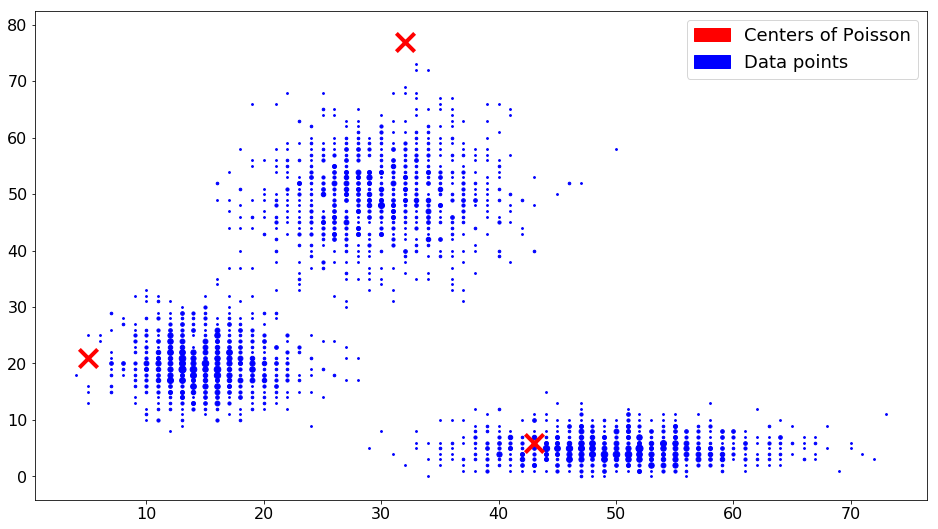

In [19]:
from kplusplus import KPlusPlus

mixtures = 3

kplusplus = KPlusPlus(mixtures, data[:,:2])

kplusplus.init_centers()

# random initialization
onlineEM = OnlineEM([1/mixtures]*mixtures, kplusplus.centers, 500, n_clusters=1, verbose=1)
plot_points(data[:,:2], onlineEM)

In [20]:
onlineEM.fit(data)

Running for data till position 500 from total 3000
Running for data till position 1000 from total 3000
Running for data till position 1500 from total 3000
Running for data till position 2000 from total 3000
Running for data till position 2500 from total 3000
Running for data till position 3000 from total 3000
Running clustering algorithm


In [25]:
from pylab import rcParams
from matplotlib import pyplot as plt
import numpy as np
from collections import Counter
import matplotlib.patches as mpatches

colors = ['blue', 'red', 'green', 'yellow']
styles = ['-','--',':','-.']


def plot_points(data, em):
    rcParams['figure.figsize'] = 16, 9
    data_hashable = [tuple(x) for x in data]
    total_points = len(data_hashable)

    values = np.vstack([list(x) for x in list(Counter(data_hashable).keys())])
    counts = np.array(list(Counter(data_hashable).values()))

    for i in range(len(values)):
        plt.scatter(values[i][0], values[i][1], s=counts[i]*10000/total_points, color='blue')
        
    for i, lambda_i in enumerate(em.lambdas):
        plt.scatter(lambda_i[0], lambda_i[1], s=em.gammas[i]*1000, linewidth=4, color='red', marker='x')

    blue_patch = mpatches.Patch(color='blue', label='Data points')
    red_patch = mpatches.Patch(color='red', label='Centers of Poisson')
    plt.legend(handles=[red_patch, blue_patch], fontsize=18)
    plt.show()
    
    
def plot_results(em_algorithm, legend=True):
    import matplotlib
    
    rcParams['figure.figsize'] = 16, 12

    matplotlib.rcParams.update({'font.size': 16})

    x = range(0, len(em_algorithm.get_gammas()[1]))

    plt.title('Online EM results')

    ax = plt.subplot(3, 1, 1)

    for i in range(len(em_algorithm.get_lambdas())):
        for j in range(em_algorithm.dim):
            if j == 0:
                a = plt.plot(x, np.array(em_algorithm.get_lambdas()[i])[:,j], color=colors[i % len(colors)], 
                             linestyle=styles[j % len(styles)], label='Distribution ' + str(i))
            else:
                a = plt.plot(x, np.array(em_algorithm.get_lambdas()[i])[:,j], color=colors[i % len(colors)], 
                             linestyle=styles[j % len(styles)])
    plt.ylabel('lambda')
    if legend:
        plt.legend(loc='upper right')
    plt.grid()

    plt.subplot(3, 1, 2, sharex=ax)
    for i in range(len(em_algorithm.get_gammas())):
        plt.plot(x, em_algorithm.get_gammas()[i], color=colors[i % len(colors)], label='gamme ' + str(i))
    plt.ylabel('estimated weight')
    if legend:
        plt.legend(loc='upper right')
    plt.grid()
    
    
    plt.tight_layout()
    plt.show()
    
    rcParams['figure.figsize'] = 16, 9

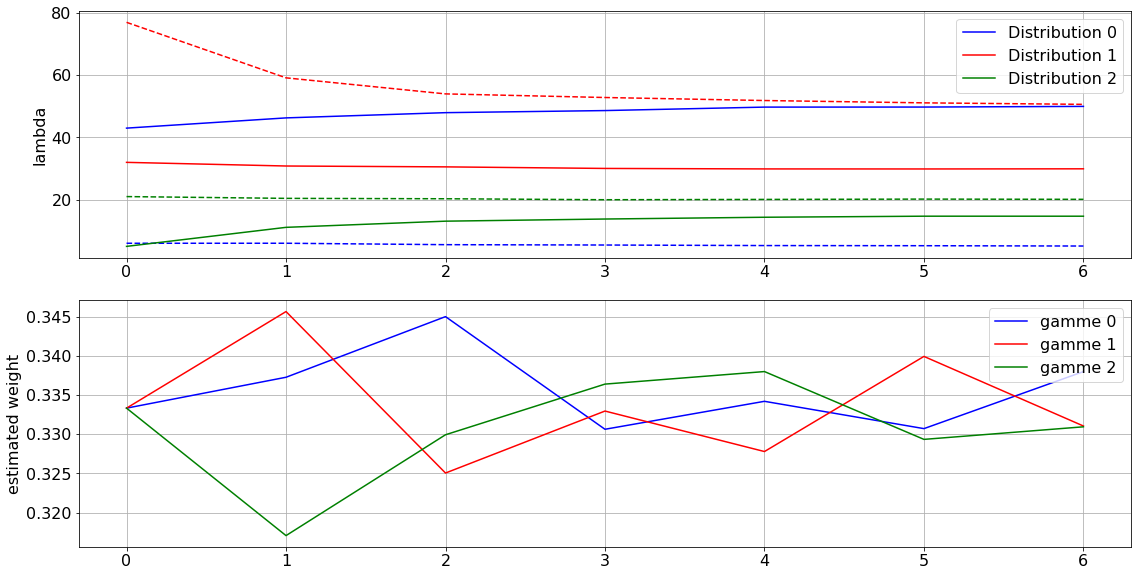

In [26]:
plot_results(onlineEM, legend=True)

In [23]:
from plots import plot_parameter_updates

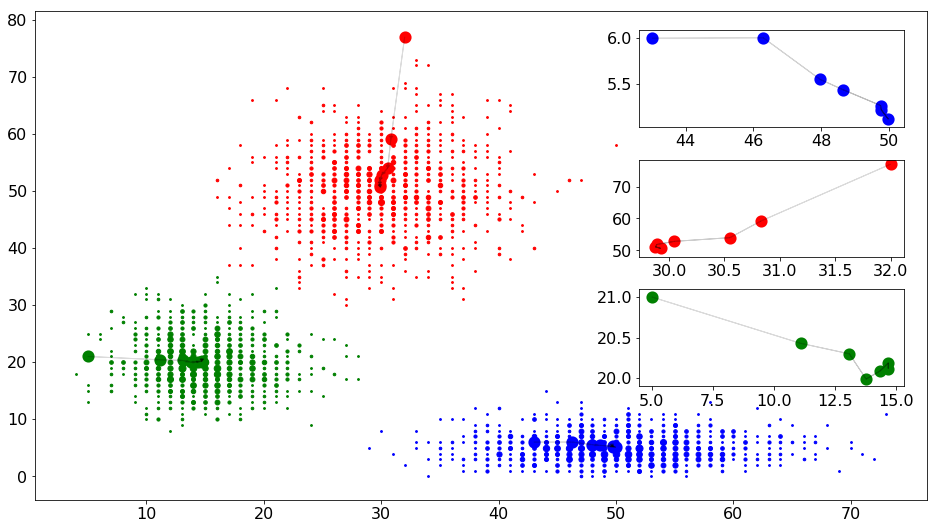

In [24]:
plot_parameter_updates(data[:,:2], onlineEM)